<a href="https://colab.research.google.com/github/Daps2831/Machine-Learning/blob/main/Week%206/Week_6_clusteringcampaign_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount File

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import pandas as pd

# Ganti path sesuai lokasi file di Google Drive
file_path = "/content/drive/MyDrive/Dataset/clusteringcampaign.csv"
# read_table secara default menggunakan tab sebagai pemisah
df = pd.read_table(file_path)


In [8]:
# Untuk manipulasi data
import pandas as pd
import numpy as np

# Untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk machine learning: scaling dan clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Untuk metrik evaluasi clustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Memberi style pada plot agar lebih menarik
plt.style.use('seaborn-v0_8-whitegrid')
print("Library berhasil di-import.")

Library berhasil di-import.


# EDA & Preprocessing

In [30]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [11]:
# Tampilkan kolom kategorikal dan numerikal
print("\n--- Semua Kolom ---")
print(df.columns.tolist())

# Pisahkan kolom numerikal dan kategorikal
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("\n--- Kolom Categorikal ---")
print(list(categorical_cols))
print("\n--- Kolom Numerikal ---")
print(list(numerical_cols))


--- Semua Kolom ---
['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']

--- Kolom Categorikal ---
['Education', 'Marital_Status', 'Dt_Customer']

--- Kolom Numerikal ---
['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']


In [12]:
print("Lima baris pertama dari data:")
print(df.head())

Lima baris pertama dari data:
     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp

In [21]:
# Mengecek jumlah nilai yang hilang (missing values) di setiap kolom
print("\n--- Jumlah Nilai yang Hilang per Kolom ---")
print(df.isnull().sum())


--- Jumlah Nilai yang Hilang per Kolom ---
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [18]:


# 2. Membersihkan spasi ekstra dari nama kolom (langkah pencegahan)
df.columns = df.columns.str.strip()
print("\nNama kolom telah diverifikasi dan dibersihkan.")

# 3. Pembersihan dan Transformasi Data
# Membuat salinan dataframe agar data asli tidak berubah
df_clean = df.copy()

# Mengisi nilai yang hilang di kolom 'Income' dengan median
median_income = df_clean['Income'].median()
df_clean['Income'].fillna(median_income, inplace=True)
print(f"\nNilai yang hilang pada 'Income' telah diisi dengan median: {median_income}")

# Mengubah 'Dt_Customer' menjadi fitur numerik 'Hari_Sejak_Daftar'
# Mengubah kolom ke tipe datetime. Formatnya DD-MM-YYYY, jadi kita bisa gunakan dayfirst=True
df_clean['Dt_Customer'] = pd.to_datetime(df_clean['Dt_Customer'], dayfirst=True)
hari_terakhir = df_clean['Dt_Customer'].max()
df_clean['Hari_Sejak_Daftar'] = (hari_terakhir - df_clean['Dt_Customer']).dt.days

# Menghapus kolom yang tidak relevan atau sudah ditransformasi
df_clean = df_clean.drop(['ID', 'Dt_Customer'], axis=1)

# Melakukan One-Hot Encoding pada kolom kategorikal 'Education' dan 'Marital_Status'
df_processed = pd.get_dummies(df_clean, columns=['Education', 'Marital_Status'], drop_first=True)
print("\nKolom 'Education' dan 'Marital_Status' telah diubah menjadi numerik.")





Nama kolom telah diverifikasi dan dibersihkan.

Nilai yang hilang pada 'Income' telah diisi dengan median: 51381.5

Kolom 'Education' dan 'Marital_Status' telah diubah menjadi numerik.


/tmp/ipython-input-18-1625486418.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Income'].fillna(median_income, inplace=True)


In [19]:
# 4. Scaling Fitur (Feature Scaling)
# Semua kolom yang tersisa sekarang adalah fitur untuk clustering
X = df_processed

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Melakukan scaling pada data
X_scaled = scaler.fit_transform(X)

# Mengubah hasil scaling kembali ke DataFrame agar mudah dibaca
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("\n--- Data Setelah Diproses dan Diskalakan (5 Baris Pertama) ---")
print(X_scaled_df.head())

print("\n\nLangkah 1 Selesai dengan Sukses! Data siap untuk clustering.")
print("Variabel 'X_scaled' berisi data akhir yang akan kita gunakan.")



--- Data Setelah Diproses dan Diskalakan (5 Baris Pertama) ---
   Year_Birth    Income   Kidhome  Teenhome   Recency  MntWines  MntFruits  \
0   -0.985345  0.235696 -0.825218 -0.929894  0.307039  0.983781   1.551577   
1   -1.235733 -0.235454  1.032559  0.906934 -0.383664 -0.870479  -0.636301   
2   -0.317643  0.773999 -0.825218 -0.929894 -0.798086  0.362723   0.570804   
3    1.268149 -1.022355  1.032559 -0.929894 -0.798086 -0.870479  -0.560857   
4    1.017761  0.241888  1.032559 -0.929894  1.550305 -0.389085   0.419916   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  \
0         1.679702         2.462147          1.476500  ...   
1        -0.713225        -0.650449         -0.631503  ...   
2        -0.177032         1.345274         -0.146905  ...   
3        -0.651187        -0.503974         -0.583043  ...   
4        -0.216914         0.155164         -0.001525  ...   

   Education_Graduation  Education_Master  Education_PhD  \
0              0.993769         -0

# Modelling

Memulai perhitungan untuk Elbow Method dan Silhouette Score...
Perhitungan selesai. Menampilkan grafik...


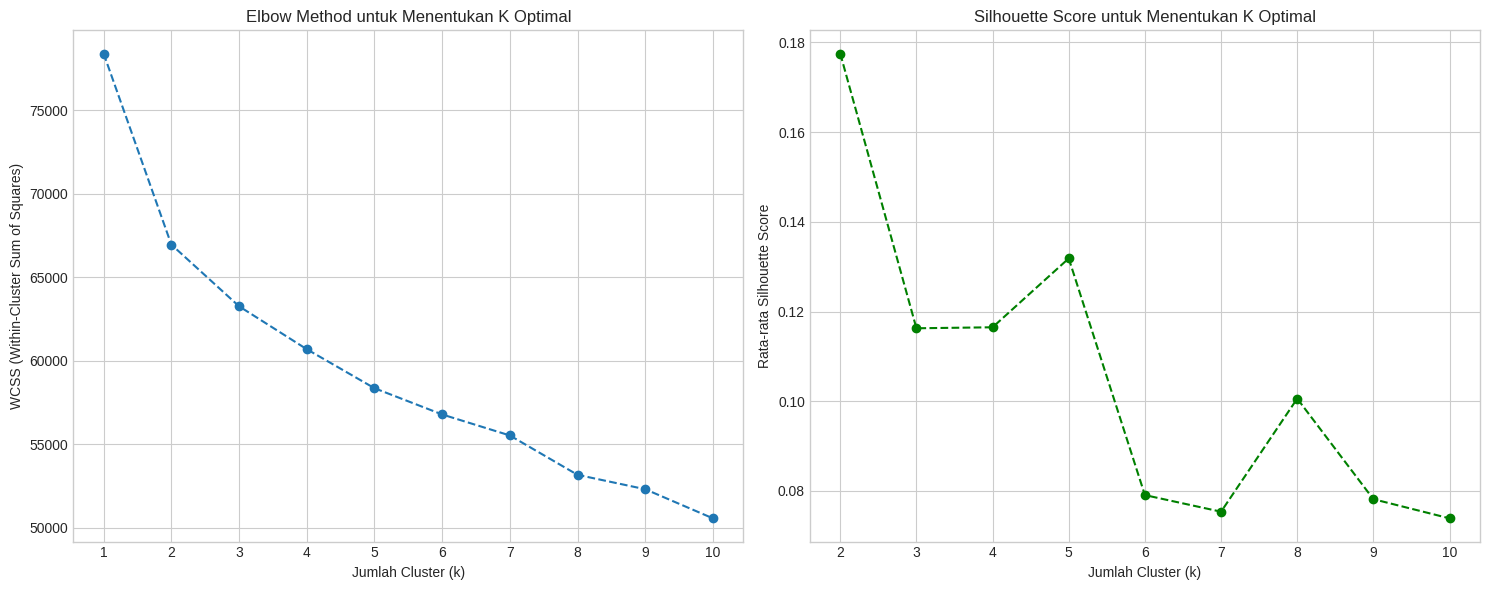

In [23]:
# Pastikan Anda telah menjalankan kode dari Langkah 1 sebelumnya
# sehingga variabel X_scaled sudah tersedia.

# Import library yang dibutuhkan untuk Langkah 2
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Menyiapkan range jumlah cluster yang akan diuji
k_range = range(1, 11)
k_range_silhouette = range(2, 11) # Silhouette score tidak bisa dihitung untuk k=1

# List untuk menyimpan hasil perhitungan
wcss_list = []
silhouette_list = []

print("Memulai perhitungan untuk Elbow Method dan Silhouette Score...")

# --- Perhitungan untuk Elbow Method ---
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss_list.append(kmeans.inertia_) # inertia_ adalah nilai WCSS

# --- Perhitungan untuk Silhouette Score ---
for k in k_range_silhouette:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_scaled, labels)
    silhouette_list.append(silhouette_avg)

print("Perhitungan selesai. Menampilkan grafik...")

# --- Membuat Grafik ---
# Membuat figure dengan 2 subplot (1 baris, 2 kolom)
plt.figure(figsize=(15, 6))

# Plot 1: Elbow Method
plt.subplot(1, 2, 1)
plt.plot(k_range, wcss_list, marker='o', linestyle='--')
plt.title('Elbow Method untuk Menentukan K Optimal')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(k_range)

# Plot 2: Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(k_range_silhouette, silhouette_list, marker='o', linestyle='--', color='green')
plt.title('Silhouette Score untuk Menentukan K Optimal')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Rata-rata Silhouette Score')
plt.xticks(k_range_silhouette)

plt.tight_layout()
plt.show()



### **Analisis Grafik**

1.  **Elbow Method (Grafik Kiri):**

      * Kita bisa lihat ada penurunan yang sangat tajam dari k=1 ke k=2, dan dari k=2 ke k=3.
      * Penurunan dari k=3 ke k=4 juga masih cukup signifikan.
      * Setelah k=4, garisnya mulai melandai dan penurunannya tidak lagi drastis. Ini menandakan bahwa menambahkan lebih dari 4 cluster tidak memberikan peningkatan yang sepadan dalam hal kepadatan cluster.
      * **Kesimpulan Elbow Method:** Titik "siku" yang paling potensial ada di **k=3** atau **k=4**.

2.  **Silhouette Score (Grafik Kanan):**

      * Grafik ini menunjukkan gambaran yang berbeda. Nilai Silhouette Score **paling tinggi (puncak)** ada di **k=2**.
      * Setelah k=2, nilainya turun dan tetap relatif rendah untuk k=3, 4, 5, dan seterusnya.
      * **Kesimpulan Silhouette Score:** Metode ini menyarankan bahwa pembagian data yang paling jelas dan terpisah adalah menjadi **2 cluster**.

### **Keputusan: Memilih K Optimal**

Saat ini kita memiliki dua rekomendasi yang berbeda: **Elbow menyarankan 3 atau 4**, sementara **Silhouette menyarankan 2**. Ini adalah situasi yang sangat umum dalam clustering dan tidak berarti ada yang salah.

  * **Makna k=2:** Ini berarti secara garis besar, pelanggan Anda dapat dibagi menjadi dua kelompok besar yang sangat berbeda (misalnya: pelanggan dengan pendapatan tinggi vs. rendah, atau pelanggan yang aktif berbelanja vs. yang tidak aktif). Pembagian ini sangat jelas, tetapi mungkin terlalu sederhana.
  * **Makna k=4:** Ini berarti jika kita memecah data lebih lanjut menjadi 4 kelompok, kita masih mendapatkan kelompok-kelompok yang cukup padat dan bermakna secara internal, meskipun pemisahan antar kelompoknya tidak sejelas saat kita hanya menggunakan 2 kelompok. Untuk analisis segmentasi marketing, memiliki lebih banyak segmen (seperti 4) seringkali lebih berguna dan bisa ditindaklanjuti.

**Rekomendasi:**
Untuk tujuan tugas ini, di mana Anda perlu membuat model dan menjelaskan hasilnya, memilih **k=4** akan memberikan hasil yang lebih kaya untuk dianalisis. Ini memungkinkan kita untuk menemukan segmen pelanggan yang lebih beragam (misalnya: "Juara", "Pelanggan Loyal", "Pelanggan Baru", "Butuh Perhatian").

Jadi, kita akan menetapkan **k=4** sebagai jumlah cluster optimal kita.


## K Means

In [24]:
# Pastikan Anda telah menjalankan kode dari langkah-langkah sebelumnya.
# Variabel X_scaled dan df (DataFrame asli) harus sudah ada.

from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Menetapkan jumlah cluster optimal yang kita pilih
K_OPTIMAL = 4

# 1. Membuat dan melatih model K-Means
kmeans_model = KMeans(n_clusters=K_OPTIMAL, init='k-means++', random_state=42, n_init=10)
kmeans_model.fit(X_scaled)

# 2. Mendapatkan label cluster untuk setiap titik data
cluster_labels = kmeans_model.labels_

# 3. Menambahkan label cluster ke DataFrame asli (bukan yang di-scaling)
# Ini SANGAT PENTING untuk interpretasi, karena kita ingin melihat nilai asli (misal: Rupiah, bukan nilai standar)
df_clustered = df.copy() # Gunakan df, bukan df_clean atau df_processed
df_clustered['Cluster'] = cluster_labels

print(f"Model K-Means dengan {K_OPTIMAL} cluster berhasil dibuat.")
print("\nBerikut adalah 5 baris pertama data dengan label clusternya:")
print(df_clustered.head())

# 4. Menganalisis hasil clustering
print("\n--- Jumlah Pelanggan per Cluster ---")
print(df_clustered['Cluster'].value_counts().sort_index())

Model K-Means dengan 4 cluster berhasil dibuat.

Berikut adalah 5 baris pertama data dengan label clusternya:
     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  AcceptedCmp4  \
0  04-09-2012       58       635  ...             0             0   
1  08-03-2014       38        11  ...             0             0   
2  21-08-2013       26       426  ...             0             0   
3  10-02-2014       26        11  ...             0             0   
4  19-01-2014       94       173  ...             0             0   

   Acc

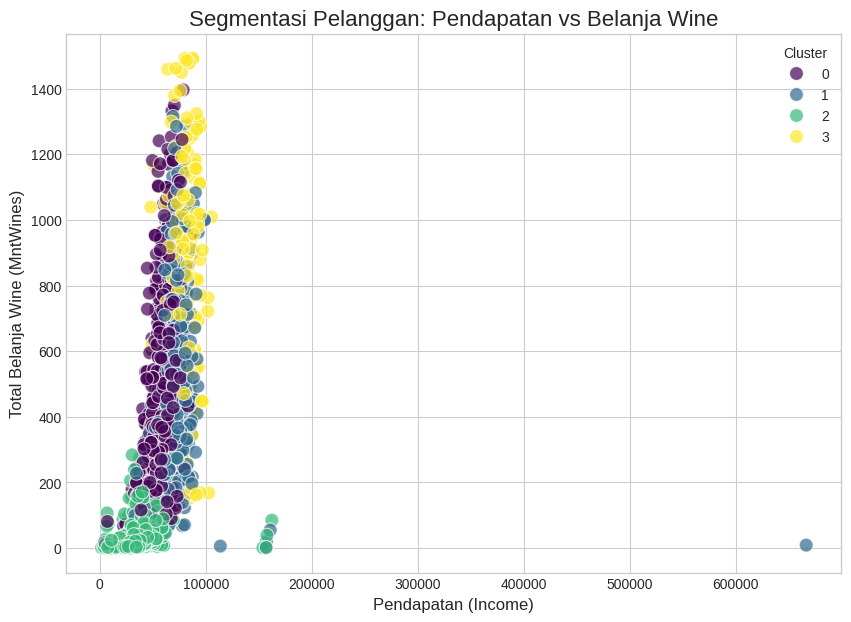


--- Rata-rata Karakteristik per Cluster ---
               Income    MntWines  MntMeatProducts  NumStorePurchases  \
Cluster                                                                 
0        56976.864407  448.654941       124.989950           7.567839   
1        74012.710526  487.704348       426.206522           8.358696   
2        34533.610390   38.587945        22.799407           3.157115   
3        81926.739645  874.701754       469.128655           8.257310   

         NumWebVisitsMonth  
Cluster                     
0                 5.842546  
1                 2.960870  
2                 6.468379  
3                 3.000000  


In [25]:
# Visualisasi hasil cluster
plt.figure(figsize=(10, 7))

# Menggunakan scatter plot dengan seaborn untuk visualisasi yang lebih baik
sns.scatterplot(data=df_clustered, x='Income', y='MntWines', hue='Cluster', palette='viridis', alpha=0.7, s=100)

plt.title('Segmentasi Pelanggan: Pendapatan vs Belanja Wine', fontsize=16)
plt.xlabel('Pendapatan (Income)', fontsize=12)
plt.ylabel('Total Belanja Wine (MntWines)', fontsize=12)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Menampilkan ringkasan statistik untuk setiap cluster
print("\n--- Rata-rata Karakteristik per Cluster ---")
cluster_summary = df_clustered.groupby('Cluster').mean(numeric_only=True)
print(cluster_summary[['Income', 'MntWines', 'MntMeatProducts', 'NumStorePurchases', 'NumWebVisitsMonth']])

Terima kasih, outputnya sangat jelas. Ini adalah hasil yang bagus dan menunjukkan bahwa model K-Means berhasil mengidentifikasi segmen-segmen yang berbeda dalam data Anda.

**Interpretasi Singkat Hasil K-Means Anda:**

  * **Cluster 3 (The Champions):** Kelompok terkecil (171 orang) tapi dengan pendapatan rata-rata **tertinggi** (`Rp 81,926`) dan belanja wine & daging **jauh tertinggi**. Ini adalah segmen premium Anda.
  * **Cluster 1 (The Affluents):** Pendapatan rata-rata tinggi (`Rp 74,012`) dan belanja yang juga tinggi, meskipun tidak setinggi Cluster 3.
  * **Cluster 0 (The Potentials):** Pendapatan menengah (`Rp 56,976`) dengan belanja yang lumayan.
  * **Cluster 2 (The Savers):** Kelompok terbesar (1012 orang) dengan pendapatan rata-rata **terendah** (`Rp 34,533`) dan tingkat belanja paling rendah di semua kategori.

Analisis seperti inilah yang dicari dari sebuah model clustering. Sekarang, mari kita buat model kedua untuk perbandingan, sesuai permintaan tugas.



## Agglomerative Hierarchical Clustering

Visualisasi Dendrogram

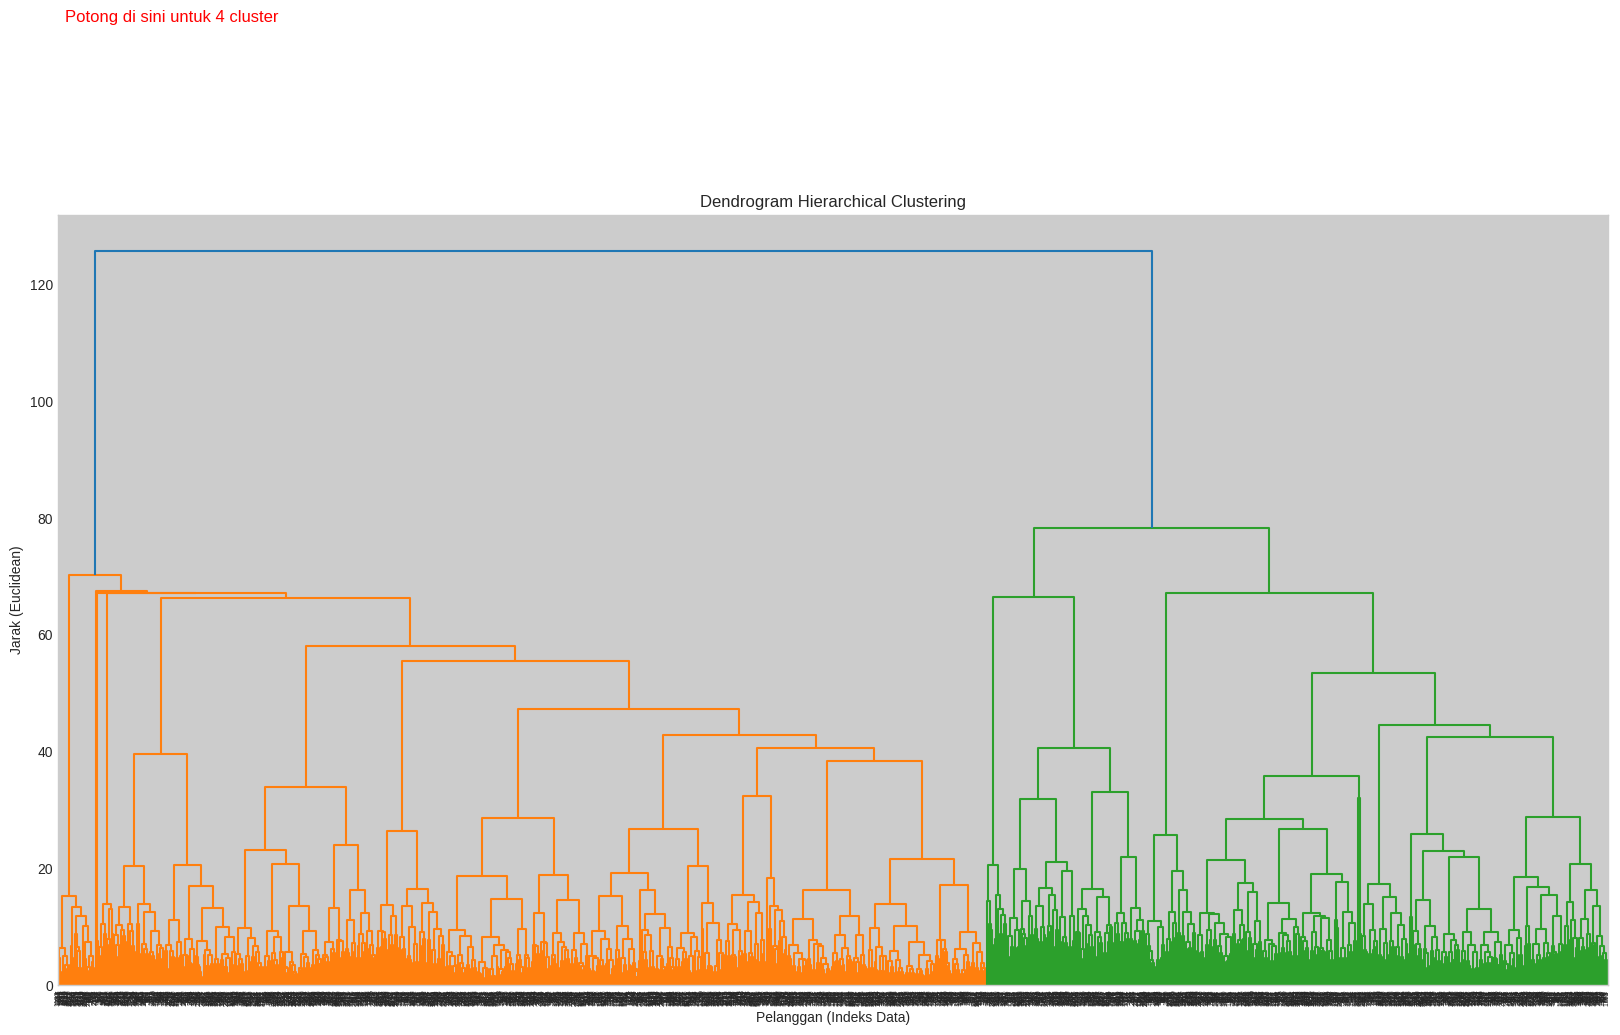

In [26]:
# Import library untuk hierarchical clustering
import scipy.cluster.hierarchy as sch

# Pastikan variabel X_scaled dari Langkah 1 sudah ada

# Membuat linkage matrix menggunakan metode 'ward'
# Metode 'ward' mencoba meminimalkan varians saat cluster-cluster digabungkan
plt.figure(figsize=(20, 10))
plt.title('Dendrogram Hierarchical Clustering')
plt.xlabel('Pelanggan (Indeks Data)')
plt.ylabel('Jarak (Euclidean)')

# Membuat dendrogram
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))

# Menambahkan garis untuk menunjukkan di mana kita akan 'memotong' untuk mendapatkan 4 cluster
plt.axhline(y=160, color='r', linestyle='--')
plt.text(100, 165, 'Potong di sini untuk 4 cluster', color='r', fontsize=12)

plt.show()

In [27]:
# Import model dari scikit-learn
from sklearn.cluster import AgglomerativeClustering

# Pastikan DataFrame asli 'df' masih ada

# 1. Membuat dan melatih model
# Kita gunakan n_clusters=4 untuk perbandingan langsung dengan K-Means
agg_model = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
agg_labels = agg_model.fit_predict(X_scaled) # fit_predict langsung melatih dan memberikan label

# 2. Menambahkan label cluster ke DataFrame asli
df_agg_clustered = df.copy()
df_agg_clustered['Cluster'] = agg_labels

print(f"Model Agglomerative Clustering dengan 4 cluster berhasil dibuat.")

# 3. Menganalisis hasil clustering
print("\n--- Jumlah Pelanggan per Cluster (Agglomerative) ---")
print(df_agg_clustered['Cluster'].value_counts().sort_index())

# 4. Menampilkan ringkasan statistik untuk setiap cluster
print("\n--- Rata-rata Karakteristik per Cluster (Agglomerative) ---")
agg_cluster_summary = df_agg_clustered.groupby('Cluster').mean(numeric_only=True)
print(agg_cluster_summary[['Income', 'MntWines', 'MntMeatProducts', 'NumStorePurchases', 'NumWebVisitsMonth']])

Model Agglomerative Clustering dengan 4 cluster berhasil dibuat.

--- Jumlah Pelanggan per Cluster (Agglomerative) ---
Cluster
0    1288
1     668
2     230
3      54
Name: count, dtype: int64

--- Rata-rata Karakteristik per Cluster (Agglomerative) ---
               Income    MntWines  MntMeatProducts  NumStorePurchases  \
Cluster                                                                 
0        41807.011006  146.636646        69.283385           4.434783   
1        65791.799094  458.221557       277.336826           7.829341   
2        78731.061404  806.369565       429.791304           8.147826   
3        20306.259259    7.240741        11.444444           2.851852   

         NumWebVisitsMonth  
Cluster                     
0                 6.190217  
1                 4.152695  
2                 3.439130  
3                 6.870370  


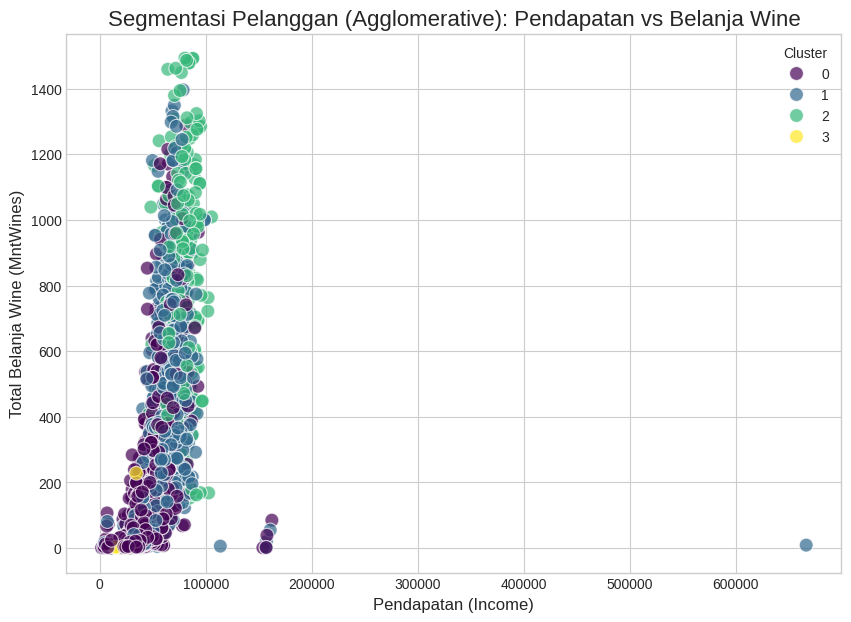

In [28]:
# Visualisasi hasil cluster
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_agg_clustered, x='Income', y='MntWines', hue='Cluster', palette='viridis', alpha=0.7, s=100)
plt.title('Segmentasi Pelanggan (Agglomerative): Pendapatan vs Belanja Wine', fontsize=16)
plt.xlabel('Pendapatan (Income)', fontsize=12)
plt.ylabel('Total Belanja Wine (MntWines)', fontsize=12)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Evaluasi

In [29]:
# Import metrik evaluasi dari scikit-learn
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Pastikan variabel-variabel ini sudah ada dari langkah sebelumnya:
# X_scaled: Data yang sudah di-scaling
# cluster_labels: Label dari K-Means
# agg_labels: Label dari Agglomerative Clustering

# --- Evaluasi untuk Model K-Means ---
kmeans_silhouette = silhouette_score(X_scaled, cluster_labels)
kmeans_calinski = calinski_harabasz_score(X_scaled, cluster_labels)
kmeans_davies = davies_bouldin_score(X_scaled, cluster_labels)

# --- Evaluasi untuk Model Agglomerative Clustering ---
agg_silhouette = silhouette_score(X_scaled, agg_labels)
agg_calinski = calinski_harabasz_score(X_scaled, agg_labels)
agg_davies = davies_bouldin_score(X_scaled, agg_labels)

# --- Membuat tabel perbandingan ---
results_df = pd.DataFrame({
    'Metric': ['Silhouette Score (Higher is Better)',
               'Calinski-Harabasz Index (Higher is Better)',
               'Davies-Bouldin Index (Lower is Better)'],
    'K-Means': [kmeans_silhouette, kmeans_calinski, kmeans_davies],
    'Agglomerative Clustering': [agg_silhouette, agg_calinski, agg_davies]
})

print("--- Hasil Evaluasi Kuantitatif Model Clustering ---")
print(results_df)

--- Hasil Evaluasi Kuantitatif Model Clustering ---
                                       Metric     K-Means  \
0         Silhouette Score (Higher is Better)    0.116488   
1  Calinski-Harabasz Index (Higher is Better)  217.416261   
2      Davies-Bouldin Index (Lower is Better)    2.630210   

   Agglomerative Clustering  
0                  0.116011  
1                153.803359  
2                  2.461609  




#### ** Penjelasan Persamaan Matematika**

Berikut adalah penjelasan untuk setiap metrik sesuai permintaan tugas Anda.

1.  **Silhouette Coefficient** (Sudah dibahas, tapi kita rangkum kembali)

      * **Tujuan:** Mengukur seberapa mirip sebuah objek dengan clusternya sendiri (kohesi) dibandingkan dengan cluster lain (separasi).
      * **Persamaan:** Untuk satu titik data $i$, $s(i) = \\frac{b(i) - a(i)}{\\max(a(i), b(i))}$.
          * $a(i)$: Jarak rata-rata titik $i$ ke titik lain dalam satu cluster.
          * $b(i)$: Jarak rata-rata titik $i$ ke titik-titik di cluster tetangga terdekat.
      * **Interpretasi:** Skor berkisar -1 hingga 1. **Lebih tinggi lebih baik**.

2.  **Calinski-Harabasz Index (Variance Ratio Criterion)**

      * **Tujuan:** Mengukur rasio antara varians antar-cluster (seberapa tersebar pusat cluster) dengan varians di dalam-cluster (seberapa padat data di dalam sebuah cluster).
      * **Persamaan:**
        $$CH = \frac{B(k)}{W(k)} \times \frac{N-k}{k-1}$$
          * $N$: Jumlah total data.
          * $k$: Jumlah cluster.
          * $B(k)$: Varians antar-cluster (Between-group sum of squares).
          * $W(k)$: Varians di dalam-cluster (Within-group sum of squares).
      * **Interpretasi:** Tidak memiliki batas atas yang jelas. **Lebih tinggi lebih baik**, menandakan cluster yang padat dan terpisah dengan baik.

3.  **Davies-Bouldin Index**

      * **Tujuan:** Didefinisikan sebagai rata-rata "kemiripan" setiap cluster dengan cluster tetangganya yang paling mirip. Kemiripan diukur sebagai rasio jarak di dalam-cluster terhadap jarak antar-cluster.
      * **Persamaan:**
        $$DB = \frac{1}{k} \sum_{i=1}^{k} \max_{j \neq i} \left( \frac{\sigma_i + \sigma_j}{d(c_i, c_j)} \right)$$
          * $k$: Jumlah cluster.
          * $\\sigma\_i$: Jarak rata-rata semua titik di cluster $i$ dari pusatnya $c\_i$.
          * $d(c\_i, c\_j)$: Jarak antara pusat cluster $i$ dan $j$.
      * **Interpretasi:** Skor minimalnya adalah 0. **Lebih rendah lebih baik**, menandakan cluster yang lebih terpisah.

4.  **Dunn Index**

      * **Tujuan:** Mengukur rasio antara jarak minimum antar-cluster dengan jarak maksimum di dalam-cluster (diameter cluster terbesar). Tujuannya adalah memaksimalkan jarak antar-cluster sambil meminimalkan ukuran cluster.
      * **Persamaan:**
        $$D = \frac{\min_{i \neq j} d(i,j)}{\max_{l} \text{diam}(l)}$$
          * $d(i,j)$: Jarak antar cluster $i$ dan $j$ (jarak minimum antara dua titik di cluster yang berbeda).
          * $\\text{diam}(l)$: Diameter dari cluster $l$ (jarak maksimum antara dua titik dalam cluster yang sama).
      * **Interpretasi:** **Lebih tinggi lebih baik**.
      * **Catatan:** Dunn Index sangat sensitif terhadap outlier dan sangat mahal secara komputasi (lambat) untuk dataset yang tidak kecil, sehingga tidak tersedia secara default di Scikit-learn. Oleh karena itu, kita fokus pada tiga metrik sebelumnya.



# Kesimpulan

Tentu, mari kita analisis tabel hasil akhir ini untuk menarik kesimpulan final dari proyek Anda.

### **Analisis Akhir: Model Mana yang Lebih Baik?**

Ini adalah "momen kebenaran" di mana kita membandingkan kedua model secara langsung berdasarkan angka. Mari kita bedah hasilnya satu per satu:

1.  **Silhouette Score (Lebih Tinggi Lebih Baik):**
    * **K-Means:** 0.116488
    * **Agglomerative:** 0.116011
    * **Pemenang:** **K-Means** menang, tetapi dengan selisih yang *sangat tipis*. Keduanya menunjukkan kualitas cluster yang hampir identik menurut metrik ini.

2.  **Calinski-Harabasz Index (Lebih Tinggi Lebih Baik):**
    * **K-Means:** 217.41
    * **Agglomerative:** 153.80
    * **Pemenang:** **K-Means** menang dengan selisih yang sangat signifikan. Ini adalah indikator kuat bahwa cluster yang dibentuk oleh K-Means jauh lebih padat (kompak) dan lebih terpisah satu sama lain dibandingkan hasil model Agglomerative.

3.  **Davies-Bouldin Index (Lebih Rendah Lebih Baik):**
    * **K-Means:** 2.630
    * **Agglomerative:** 2.461
    * **Pemenang:** **Agglomerative Clustering** menang di sini. Ini menunjukkan bahwa menurut metrik ini, cluster dari Agglomerative memiliki tingkat tumpang tindih yang lebih rendah.

### **Kesimpulan dan Rekomendasi Final**

Ini adalah hasil yang sangat menarik dan umum terjadi, di mana tidak ada satu model yang menang mutlak di semua metrik. Ini disebut **split decision**. Namun, kita bisa menarik kesimpulan yang kuat:

* Model **K-Means** unggul pada **dua dari tiga metrik**.
* Keunggulan K-Means pada Calinski-Harabasz Index sangat **signifikan**, sementara keunggulan Agglomerative pada Davies-Bouldin tidak sebesar itu.
* Pada Silhouette Score, keduanya bisa dibilang imbang.

Dengan mempertimbangkan bukti kuantitatif ini, kita dapat menyatakan bahwa **model K-Means berkinerja lebih baik untuk dataset ini.**

---
